Hyperspectral Images(HSI) Analysis Simplified
This tutorial focuses on:

1. Introduction
2. How to download HSI
3. Reading hyperspectral image
4. Visualizing the bands of the Hyperspectral image
5. Visualizing ground truth of the image.
6. Extracting pixels of the HSI
7. Visualizing spectral signatures

## 1. Introduction

### 2. How to download Hyperspectral images

* The bench mark hyperspectral image 
datasets are available on the http://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes website.
* Copy the download link address of the hyperspectral image dataset and use wget command to download.
* The entire tutorial uses Indian Pines HSI Dataset.

In [7]:
!wget "http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat"

!wget "http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat"

--2022-09-27 02:44:53--  http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat [following]
--2022-09-27 02:44:53--  https://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5953527 (5.7M)
Saving to: ‘Indian_pines_corrected.mat.2’

Indian_pines_correc 100%[===================>]   5.68M  2.08MB/s    in 2.7s    

2022-09-27 02:44:57 (2.08 MB/s) - ‘Indian_pines_corrected.mat.2’ saved [5953527/5953527]

--2022-09-27 02:44:57--  http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Conne

#	Class	Samples





**Indian_pines_corrected.mat** - The data set in .mat format

**Indian_pines_gt.mat** - The ground truth of the dataset in .mat format

Groundtruth classes for the Indian Pines scene and their respective samples number

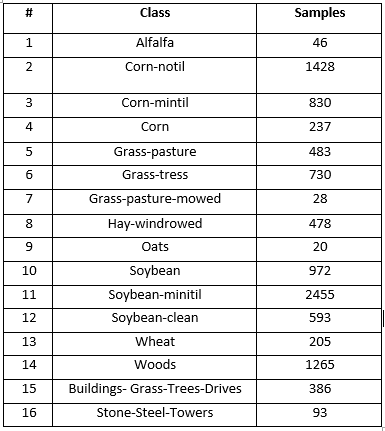

## 3. Reading hyperspectral image
* To read hyperspectral image, the scipy
python package which is used to do scientific calculations.

In [8]:
## Importing Library.
from scipy.io import loadmat

In [9]:
## Read the data.
dataset = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
ground_truth = loadmat('Indian_pines_gt.mat')['indian_pines_gt']

In [10]:
#The dimensions of the data.
print(f'Dataset: {dataset.shape}\nGround Truth: {ground_truth.shape}')

Dataset: (145, 145, 200)
Ground Truth: (145, 145)


## 4. Visualizing the bands of the Hyperspectral image
* The total number of the bands in the indian pines dataset is 200.
* The below function plots the bands of the data.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_band(dataset):
    plt.figure(figsize=(8, 6))
    band_no = np.random.randint(dataset.shape[2])
    plt.imshow(dataset[:,:, band_no], cmap='jet')
    plt.title(f'Band-{band_no}', fontsize=14)
    plt.axis('off')
    plt.colorbar()
    plt.show()
    

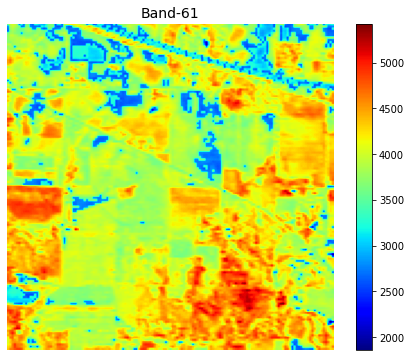

In [12]:
plot_band(dataset)

## 5. Visualizing ground truth of the image.
* The below code snippet plots the ground truth of the indian pines dataset.

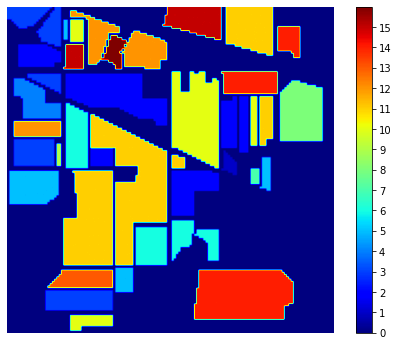

In [13]:
plt.figure(figsize=(8, 6))
plt.imshow(ground_truth, cmap='jet')
plt.axis('off')
plt.colorbar(ticks= range(0,16))
plt.show()

## 6. Extracting pixels of the HSI
* The below function is used to extrac the pixels and class labels of the hyperspectral image.

In [14]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from tqdm import tqdm
import pandas as pd
def extract_pixels(dataset, ground_truth):
    df = pd.DataFrame()
    for i in tqdm(range(dataset.shape[2])):
        df = pd.concat([df, pd.DataFrame(dataset[:, :, i].ravel())], axis=1)
    df = pd.concat([df, pd.DataFrame(ground_truth.ravel())], axis=1)
    df.columns = [f'band-{i}' for i in range(1, 1+dataset.shape[2])]+['class']
    return df
        

In [16]:
df = extract_pixels(dataset, ground_truth)

100%|██████████| 200/200 [00:01<00:00, 197.90it/s]


In [17]:
df.head()

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


Saving the data to a csv file

In [18]:
df.to_csv('Dataset.csv', index=False)

## 7. Visualizing spectral signatures
The below function plots the spectral signature.

In [19]:
def plot_signature(df):
    plt.figure(figsize=(12, 6))
    pixel_no = np.random.randint(df.shape[0])
    plt.plot(range(1, 201), df.iloc[pixel_no, :-1].values.tolist(), 'b--', label= f'Class - {df.iloc[pixel_no, -1]}')
    plt.legend()
    plt.title(f'Pixel({pixel_no}) signature', fontsize=14)
    plt.xlabel('Band Number', fontsize=14)
    plt.ylabel('Pixel Intensity', fontsize=14)
    plt.show()

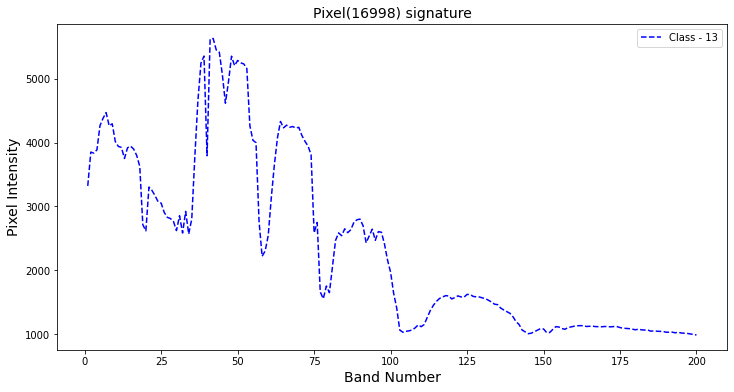

In [20]:
plot_signature(df)

# **Data Analysis of the Indian Pines hyperspectral image dataset**
This notebook depicts different visualizations of the indian pines dataset.

## 1. Importing modules

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import pandas as pd
import numpy as np

## 2. Read the dataset

In [30]:
df = pd.read_csv('Dataset.csv')

##3. Analysis

In [31]:
df.head()


,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


Showing randomly 6 rows of the dataset

In [32]:
df.sample(6)


,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
12115,3705,4371,4417,4493,4856,5257,5443,5347,5316,5129,...,1111,1112,1118,1095,1084,1077,1055,1023,1014,2
18359,2986,3850,3928,3820,4141,4268,4318,4158,4045,3792,...,1012,1016,1020,1017,1014,1002,1007,1008,1013,14
476,2570,4135,4144,4033,4344,4698,4782,4592,4556,4287,...,1043,1035,1040,1040,1029,1030,1022,1015,1010,0
13394,2589,4114,4399,4341,4764,5121,5134,5016,5013,4788,...,1106,1106,1105,1087,1068,1077,1046,1022,1009,11
18594,2728,4105,4392,4270,4707,4879,5096,4978,4965,4750,...,1087,1095,1101,1074,1055,1068,1042,1027,1009,3
9464,2604,4247,4678,4416,4952,5234,5415,5314,5317,5118,...,1115,1115,1115,1100,1077,1084,1055,1033,1010,2


In [33]:
print(f'Shape of the data: {df.shape}')

Shape of the data: (21025, 201)


In [34]:
print(f"Unique Class Labels: {df.loc[:, 'class'].unique()}")

Unique Class Labels: [ 3  0 15 11 12  5 10 14 16  2  4  8  6  9  1  7 13]


In [35]:
df.loc[:, 'class'].value_counts()

0     10776
11     2455
2      1428
14     1265
10      972
3       830
6       730
12      593
5       483
8       478
15      386
4       237
13      205
16       93
1        46
7        28
9        20
Name: class, dtype: int64

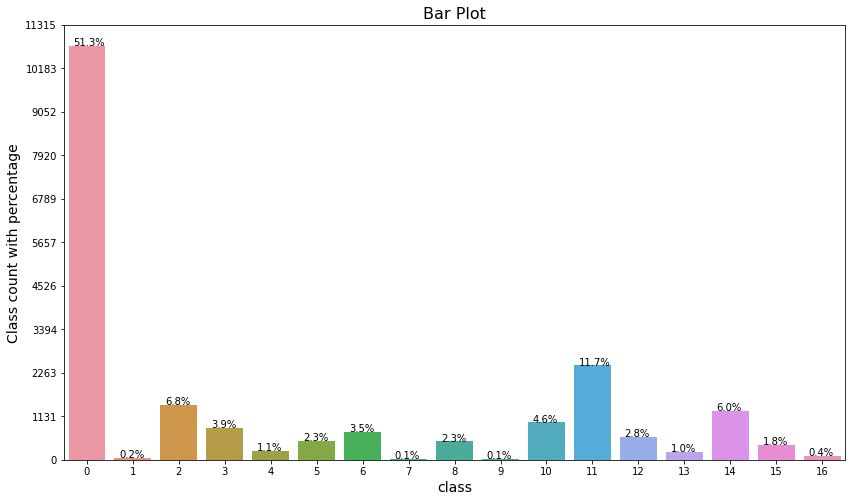

In [38]:
plt.figure(figsize=(14, 8))

ax = sns.countplot(x='class', data=df[['class']])

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/df.shape[0]), (p.get_x()+0.1, p.get_height()+5))
ax.yaxis.set_major_locator(tick.LinearLocator(11))

plt.ylabel('Class count with percentage', fontsize=14)

plt.xlabel('class', fontsize=14)

plt.title('Bar Plot', fontsize=16)

plt.show()

## 4. Visualizing pixels of the Indian Pines HSI
Usually the pixel of the indian pines HSI is a one dimensional vector with size (1, 200) ad the HSI has 200 bands.

To visualize a vector is shown below:

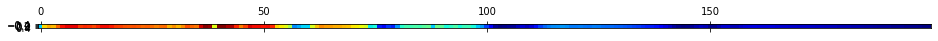

In [39]:
# Visualizing the pixel
plt.matshow(df.iloc[1, :-1].values.reshape(1,200), cmap='jet');

It is difficult to interpret the visualization of a vetor. So, to overcome this problem the pixel vector is reshape into a 2-Dimensional array.

* 200 => 10 X 20
* (1, 200) => (10, 20)

In [40]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_pixel(pixel, n):
    ax = plt.gca()
    im = ax.imshow(pixel.reshape(10, 20), cmap = 'jet')
    plt.title(f'pixel - {n}')
    plt.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

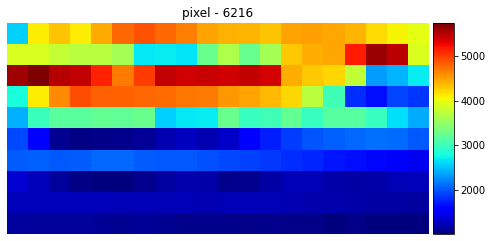

In [41]:
plt.figure(figsize=(8, 4))

rand_n = np.random.randint(df.shape[0])

plot_pixel(df.iloc[rand_n, :-1].values, rand_n)

## 5. Box plot w.r.t bands of the HSI

Enter the band Number(1-200) :167


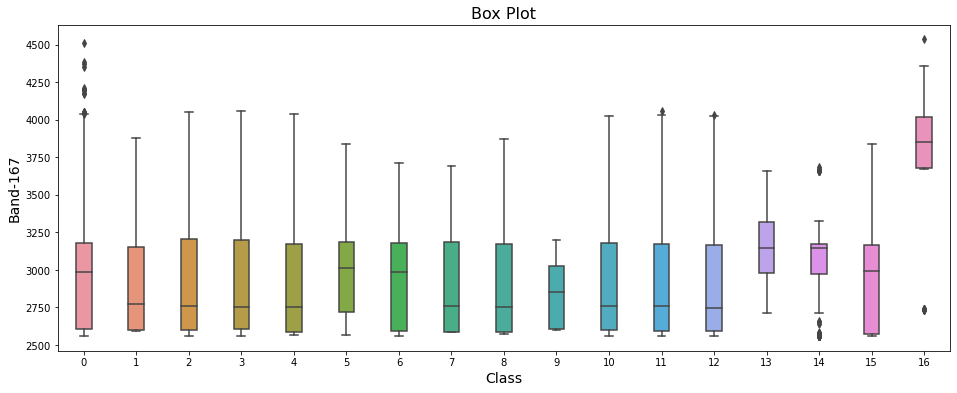

In [43]:
plt.figure(figsize=(16, 6))
n = int(input('Enter the band Number(1-200) :'))
sns.boxplot( x=df["class"], y=df["band-1"], width=0.3);
plt.title('Box Plot', fontsize= 16)
plt.xlabel('Class', fontsize= 14)
plt.ylabel(f'Band-{n}', fontsize= 14)
plt.show()

## 6. Distribution Plot

In [44]:
print(f"Details of Band - {n}: \n\n{df['band-'+str(n)].describe()}")

Details of Band - 167: 

count    21025.000000
mean      1228.068966
std        121.220250
min       1024.000000
25%       1112.000000
50%       1207.000000
75%       1349.000000
max       1710.000000
Name: band-167, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


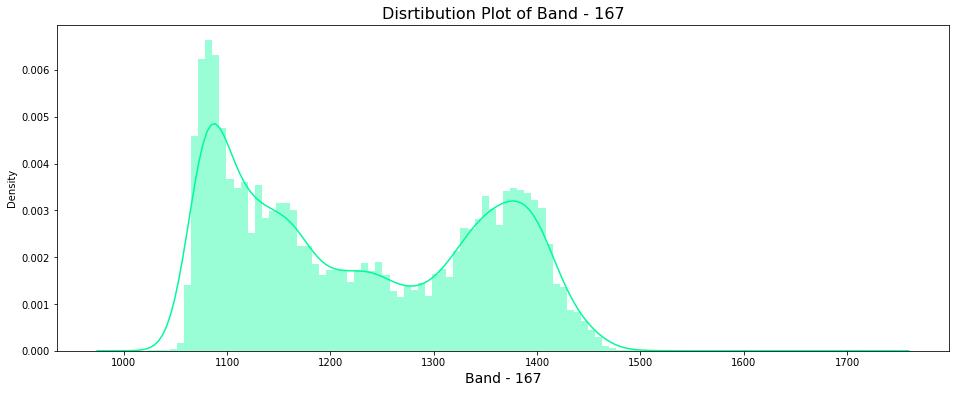

In [45]:
plt.figure(figsize=(16, 6))
sns.distplot(df['band-'+str(n)], color='mediumSpringGreen', bins=100, hist_kws={'alpha': 0.4});
plt.xlabel('Band - '+str(n), fontsize=14)
plt.title('Disrtibution Plot of Band - '+str(n), fontsize=16)
plt.show()